In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
data = pd.read_csv(url)
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [3]:
data['lead_source'].unique()

array(['paid_ads', 'social_media', 'events', 'referral', 'organic_search',
       nan], dtype=object)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [4]:
data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
cat = list(data.columns[data.dtypes == 'object'])
print(cat)
num = list(data.columns[data.dtypes != 'object'])
print(num)
num_w_target = num[:4]
print(num_w_target)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']


In [7]:
for c in cat:
    data[c] = data[c].fillna('NA')
for n in num:
    data[n] = data[n].fillna(0.0)

In [9]:
X = data.drop('converted', axis=1)
y = data['converted']

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

### Q1

In [11]:
num_w_target

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [24]:
from sklearn.metrics import roc_auc_score

In [30]:
print(roc_auc_score(y_train, X_train['number_of_courses_viewed']))
print(roc_auc_score(y_train, X_train['annual_income']))
print(roc_auc_score(y_train, X_train['interaction_count']))
print(roc_auc_score(y_train, X_train['lead_score']))

0.7550107522101766
0.5290920911520702
0.7196173657918572
0.6304434800486766


### Q2

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [32]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [42]:
dv = DictVectorizer(sparse=False)

train_dict = X_train[cat + num_w_target].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val[cat + num_w_target].to_dict(orient= 'records')
X_val = dv.transform(val_dict)

In [49]:
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:,1]

In [50]:
roc_auc_score(y_val, y_pred)

0.8549315714959888

### Q3

In [70]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)

    f1 = 2 * p * r / (p + r)

    scores.append((t, p, r, f1))


C:\Users\arka\AppData\Local\Temp\ipykernel_2672\2604580712.py:18: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [71]:
columns = ['threshold', 'precision', 'recall', 'f1_score']
df_scores = pd.DataFrame(scores, columns=columns)

# df_scores['precision'] = df_scores.precision

# df_scores['recall'] = df_scores.recall

# df_scores['f1_score'] = df_scores.f1

In [54]:
import matplotlib.pyplot as plt

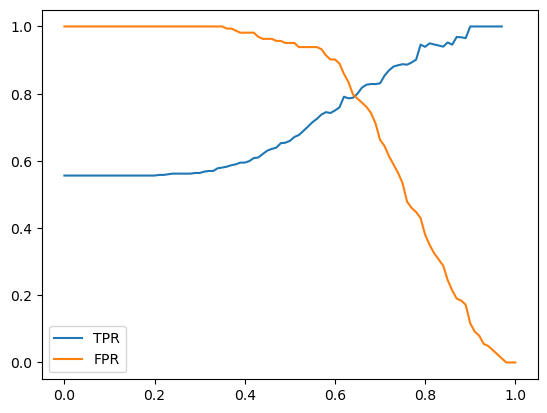

In [ ]:
plt.plot(df_scores.threshold, df_scores['precision'], label='precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='recall')
plt.legend()

### Q4

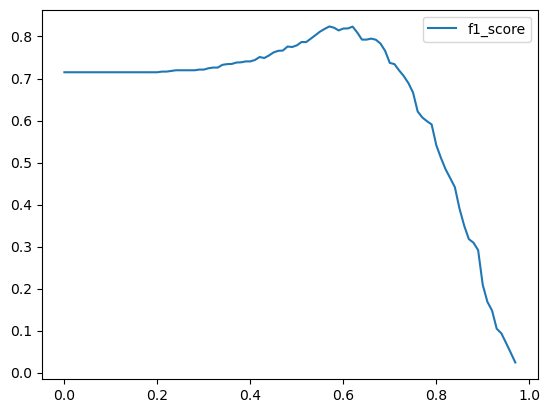

In [72]:
plt.plot(df_scores.threshold, df_scores['f1_score'], label='f1_score')
plt.legend()

In [84]:
df_scores.sort_values(by='f1_score', ascending=False)

,threshold,precision,recall,f1_score
57,0.57,0.737864,0.932515,0.823848
62,0.62,0.790960,0.858896,0.823529
58,0.58,0.745000,0.914110,0.820937
61,0.61,0.759162,0.889571,0.819209
60,0.60,0.750000,0.901840,0.818942
...,...,...,...,...
96,0.96,1.000000,0.024540,0.047904
97,0.97,1.000000,0.012270,0.024242
98,0.98,NaN,0.000000,NaN
99,0.99,NaN,0.000000,NaN


### Q5